Before running this following code, make sure you've created a folder for the project locally, added this file into it and downloaded the `requirements.txt` file into the same. 

Make sure you've run `pip install -r requirements.txt` before running the following code.

Also make sure you have downloaded and extracted the `training.csv` file from the kaggle link provided in the `readme.md` file of the github repository shared with you.

<b>Remember, if any download is in the form of a `.zip` file, you have to extract it's contents to the working directory.</b>

in case you run into any dependency error, just run  `pip install *package name of missing dependency*`.

You can always google to find the exact package name, some included in this code are, `opencv-python` for cv2, `scikit-learn` for sklearn, `matplotlib` for matplotlib etc.

In [18]:
# Importing necessary libraries/modules
import pandas as pd       # pandas for data manipulation and analysis
import numpy as np        # numpy for numerical computations
import cv2               # OpenCV for image processing
from sklearn.utils import shuffle  # For shuffling datasets
import matplotlib.pyplot as plt   # For plotting graphs and images
import os                # Operating system specific functionality (e.g., file operations)

In [19]:
def prepare_data(df):
    '''
    Prepare data (image and target variables) for training

    Parameters:
    --------------------
    df: Training dataframe

    Returns:
    -------------
    X: Image (Feature) column
    y: Target column (Facial points)
    '''

    # Create numpy array for pixel values in image column that are separated by space
    df['Image'] = df['Image'].apply(lambda x: np.fromstring(x, sep=' '))

    # Drop all rows that have missing values in them
    df = df.dropna()

    # Normalize the pixel values, scale values between 0 and 1
    X = np.vstack(df['Image'].values) / 255.
    X = X.astype(np.float32)
    # return each images as 96 x 96 x 1
    X = X.reshape(-1, 96, 96, 1)

    y = df[df.columns[:-1]].values  # (30 columns)
    # Normalize the target value, scale values between 0 and 1
    y = (y - 48) / 48
    # shuffle train data
    X, y = shuffle(X, y, random_state=42)
    y = y.astype(np.float32)

    return X, y




1. The function `prepare_data` takes a DataFrame `df` as input.

2. `df['Image'] = df['Image'].apply(lambda x: np.fromstring(x, sep=' '))`: This line converts the 'Image' column, which contains pixel values as a string of numbers separated by spaces, into a numpy array.

3. `df = df.dropna()`: This line drops any rows in the DataFrame that contain missing values (NaNs).

4. `X = np.vstack(df['Image'].values) / 255.`: This line vertically stacks the pixel arrays to form a matrix `X`. The division by 255 normalizes the pixel values to be between 0 and 1.

5. `X = X.astype(np.float32)`: This line converts the data type of `X` to `float32`.

6. `X = X.reshape(-1, 96, 96, 1)`: This line reshapes `X` into a 4D array with dimensions (number of samples, height, width, channels), where each image is now represented as 96x96 pixels with a single channel (grayscale).

7. `y = df[df.columns[:-1]].values`: This line extracts the target values (facial keypoints) from the DataFrame. `df.columns[:-1]` selects all columns except the last one.

8. `y = (y - 48) / 48`: This line normalizes the target values to be between -1 and 1, assuming the keypoints are centered around 48 (which is half of 96).

9. `X, y = shuffle(X, y, random_state=42)`: This line shuffles the training data `X` and the corresponding targets `y` using a random seed of 42 for reproducibility.

10. `y = y.astype(np.float32)`: This line converts the data type of `y` to `float32`.

11. Finally, the function returns `X` (images) and `y` (target facial keypoints).



In [20]:
import matplotlib.pyplot as plt  # Import the matplotlib library for plotting

def plot_data(img, face_points):
    '''
    Plot image and facial keypoints

    Parameters:
    --------------------
    img: Image column value
    face_point: Target column value
    '''

    # Create a figure with a specified size (30x30 inches)
    fig = plt.figure(figsize=(30, 30))

    # Add a subplot to the figure (1 row, 2 columns, this is the first subplot)
    ax = fig.add_subplot(121)

    # Plot the image. np.squeeze is used to remove any extra dimensions that may be present.
    ax.imshow(np.squeeze(img), cmap='gray')  

    # Adjust and scale the face points to fit the image size (48x48 pixels)
    face_points = face_points * 48 + 48

    # Scatter plot the facial keypoints on the image
    ax.scatter(face_points[0::2], face_points[1::2], marker='o', c='c', s=10)

    # Display the plot
    plt.show()



This function takes an image (`img`) and its associated facial keypoints (`face_points`) as inputs. It then creates a plot with two subplots. The first subplot displays the grayscale image, and the second subplot overlays the facial keypoints on top of the image.

As we ran into a problem on a few systems while importing the cnn_model.py file, we shall be incorporating that piece of code in this file itself and we'll remove the import statement at the top of this python file.
Here is the code in the next cell.

In [21]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

# Define a function to create a CNN model for facial keypoints detection
def create_model():
    '''
    Define a CNN architecture where input to the model must be 96 * 96 pixel grayscale image.
    
    Returns:
    -------------
    model: A fully-connected output layer with 30 facial keypoint values
    '''

    # Initialize a sequential model
    model = models.Sequential()

    # Add a convolutional layer with 32 filters, each of size (5, 5), using 'relu' activation function
    # Input shape is set to (96, 96, 1), as it expects a grayscale image of size 96x96 pixels
    model.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=(96, 96, 1)))

    # Add a max pooling layer with a pool size of (2, 2)
    model.add(layers.MaxPooling2D((2, 2)))

    # Add another convolutional layer with 64 filters, each of size (3, 3), using 'relu' activation function
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))

    # Add another max pooling layer with a pool size of (2, 2)
    model.add(layers.MaxPooling2D((2, 2)))

    # Add a dropout layer with a rate of 0.1 to reduce overfitting
    model.add(layers.Dropout(0.1))

    # Add another convolutional layer with 128 filters, each of size (3, 3), using 'relu' activation function
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))

    # Add another max pooling layer with a pool size of (2, 2)
    model.add(layers.MaxPooling2D((2, 2)))

    # Add a dropout layer with a rate of 0.2
    model.add(layers.Dropout(0.2))

    # Add another convolutional layer with 256 filters, each of size (3, 3), using 'relu' activation function
    model.add(layers.Conv2D(256, (3, 3), activation='relu'))

    # Add another max pooling layer with a pool size of (2, 2)
    model.add(layers.MaxPooling2D((2, 2)))

    # Add a dropout layer with a rate of 0.3
    model.add(layers.Dropout(0.3))

    # Add another convolutional layer with 256 filters, each of size (3, 3), using 'relu' activation function
    model.add(layers.Conv2D(256, (3, 3), activation='relu'))

    # Add another max pooling layer with a pool size of (2, 2)
    model.add(layers.MaxPooling2D((2, 2)))

    # Add a dropout layer with a rate of 0.3
    model.add(layers.Dropout(0.3))

    # Flatten the output for the fully connected layers
    model.add(layers.Flatten())

    # Add fully connected layers with 'relu' activation function
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))

    # Add the output layer with 30 units (for 30 facial keypoints)
    model.add(layers.Dense(30))

    return model

# Define a function to compile the model with specific optimizer, loss, and metrics
def compile_model(model, optimizer, loss, metrics):
    model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

# Define a function to train the model
def train_model(model, X_train, y_train):
    return model.fit(X_train, y_train, epochs=100, batch_size=200, verbose=1, validation_split=0.2)

# Define a function to save the trained model
def save_model(model, fileName):
    model.save(fileName + '.h5')

# Define a function to load a previously trained model
def load_model(fileName):
    return models.load_model(fileName + '.h5')


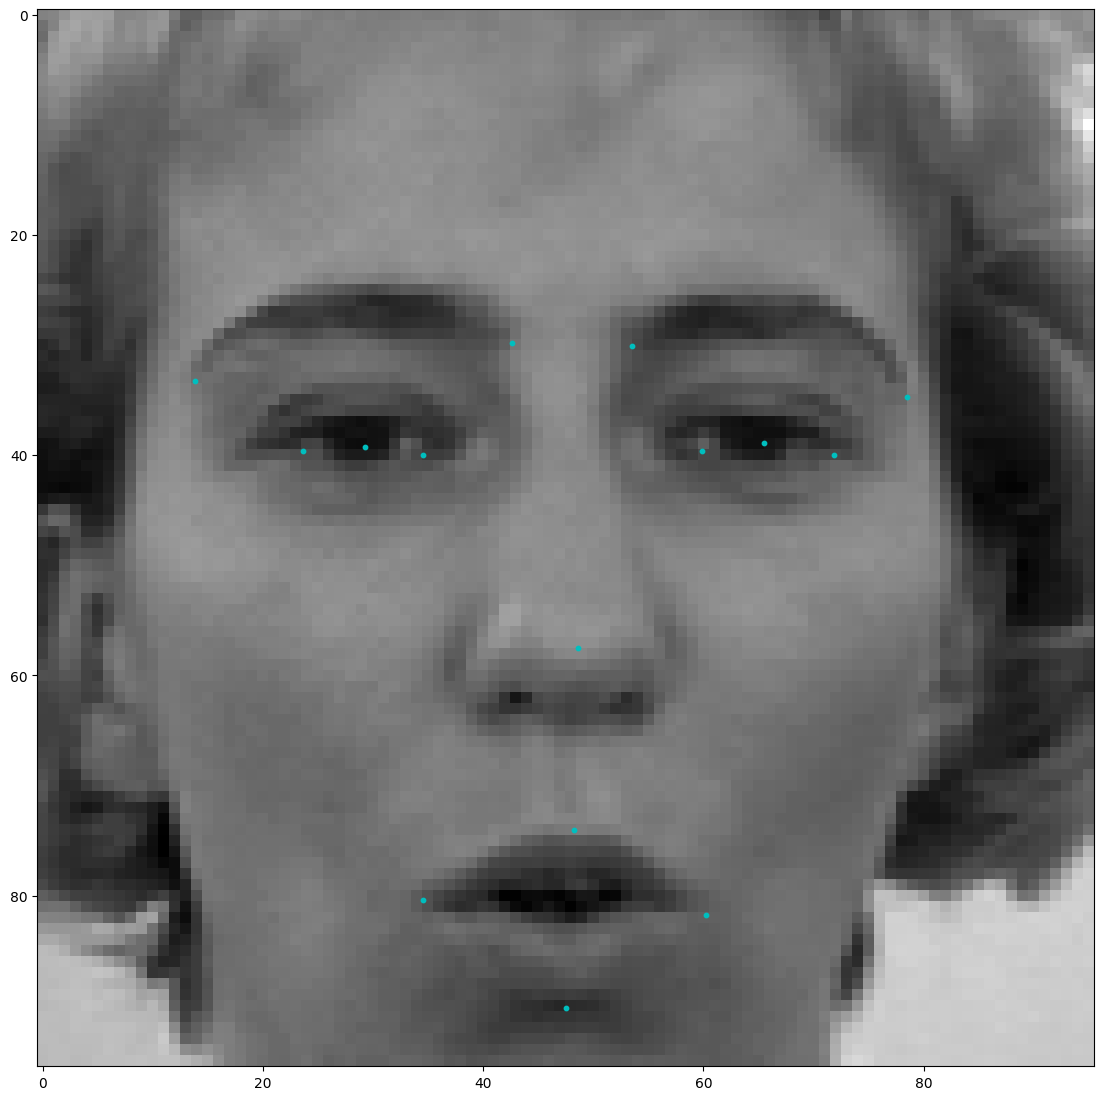

In [22]:
# Load training data
df = pd.read_csv('training.csv')

# Prepare the training data using the previously defined function
X_train, y_train = prepare_data(df)

# Plot image and facial points for train dataset
plot_data(X_train[200], y_train[200])

# Create the model architecture
my_model = create_model()



1. `df = pd.read_csv('training.csv')`: This line loads the training data from a CSV file named 'training.csv' and stores it in a pandas DataFrame called `df`.

2. `X_train, y_train = prepare_data(df)`: This line uses the `prepare_data` function (defined earlier) to prepare the training data. `X_train` will contain the images, and `y_train` will contain the corresponding facial keypoints.

3. `plot_data(X_train[200], y_train[200])`: This line calls a function `plot_data` (assuming it's defined elsewhere in the code) to plot an image and its corresponding facial keypoints. It uses the 201st sample from the training data (`X_train[200]` and `y_train[200]`).

4. `my_model = create_model()`: This line creates a model using a function named `create_model`. The model architecture is stored in the variable `my_model`.


In [23]:
# Compile the model with an appropriate optimizer and loss and metrics
compile_model(my_model, optimizer='adam',
              loss='mean_squared_error', metrics=['accuracy'])


 `compile_model(my_model, optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])`: This line calls a function `compile_model` (assuming it's defined elsewhere in the code) to compile the neural network model.

   - `my_model`: This is the neural network model that you want to compile.

   - `optimizer='adam'`: This specifies the optimizer to be used during training. In this case, it's 'adam', which is a popular choice for optimization algorithms.

   - `loss='mean_squared_error'`: This defines the loss function to be used for training. Here, it's set to 'mean_squared_error', which is commonly used for regression tasks.

   - `metrics=['accuracy']`: This specifies the evaluation metric to be used during training and testing. In this case, 'accuracy' is specified, although it's more commonly used in classification tasks. For regression tasks, metrics like Mean Absolute Error (MAE) or Root Mean Squared Error (RMSE) are more appropriate.



In [24]:
# Train the model
hist = train_model(my_model, X_train, y_train)


Epoch 1/100
9/9 [==============================] - 30s 3s/step - loss: 0.0993 - accuracy: 0.2319 - val_loss: 0.0515 - val_accuracy: 0.6963
Epoch 2/100
9/9 [==============================] - 25s 3s/step - loss: 0.0345 - accuracy: 0.3511 - val_loss: 0.0220 - val_accuracy: 0.5701
Epoch 3/100
9/9 [==============================] - 25s 3s/step - loss: 0.0161 - accuracy: 0.6273 - val_loss: 0.0212 - val_accuracy: 0.6963
Epoch 4/100
9/9 [==============================] - 24s 3s/step - loss: 0.0100 - accuracy: 0.6968 - val_loss: 0.0225 - val_accuracy: 0.6963
Epoch 5/100
9/9 [==============================] - 24s 3s/step - loss: 0.0074 - accuracy: 0.6542 - val_loss: 0.0200 - val_accuracy: 0.6963
Epoch 6/100
9/9 [==============================] - 22s 2s/step - loss: 0.0061 - accuracy: 0.6776 - val_loss: 0.0173 - val_accuracy: 0.6963
Epoch 7/100
9/9 [==============================] - 21s 2s/step - loss: 0.0058 - accuracy: 0.7027 - val_loss: 0.0204 - val_accuracy: 0.6963
Epoch 8/100
9/9 [==========

`train_model(my_model, X_train, y_train)`: This line calls a function `train_model` (assuming it's defined elsewhere in the code) to train the neural network model.

   - `my_model`: This is the neural network model that you want to train.

   - `X_train`: This contains the input images for training.

   - `y_train`: This contains the target facial keypoints for training.

   The function `train_model` likely uses the provided model (`my_model`), input data (`X_train`), and target data (`y_train`) to perform the training process.

   The function may return a history object (`hist`) which typically contains information about the training process such as loss and metric values over epochs.



In [27]:
# Change current working directory to 'D:\\PESU IO\\facial_filters'
os.chdir('C:\\Users\\Abdullah Khan\\Documents\\Projects +Yolo\\facial_detection_documented')

# Save the model to disk
save_model(my_model, 'model')


c:\Users\Abdullah Khan\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<b>In case you get an `SyntaxError: (unicode error) 'unicodeescape' codec` error, replace all the `\`(forward slash) with `\\`(double forward slashes) in the path that you specify inside the `os.chdir` command above.</b>



1. `os.chdir('D:\\PESU IO\\facial_filters')`: This line changes the current working directory to `'D:\\PESU IO\\facial_filters'`. This means that any subsequent file operations will be relative to this directory. <b>This working directory needs to be changed to a location on your system to store the data locally. Failure in doing so will lead to an error!</b>

2. `save_model(my_model, 'model')`: This line calls a function `save_model` (assuming it's defined elsewhere in the code) to save the neural network model to disk.

   - `my_model`: This is the neural network model that you want to save.

   - `'model'`: This is the name under which the model will be saved. Depending on the function, it may add file extensions like '.h5' or similar.
